In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout, Embedding, GRU

# Step 1: Load data
df = pd.read_csv('clinical_notes.csv') 
df.head()

,age,gender,race,ethnicity,language,maritalstatus,note,gpt4_summary,glaucoma,use
0,56.56,female,black,non-hispanic,english,single,ms. PERSON is a 56 yo woman presenting to esta...,The 56 y/o female patient has optic nerve head...,yes,training
1,53.91,female,white,non-hispanic,english,single,referred for evaluation of narrow angles ou #p...,Patient was referred for narrow angle evaluati...,yes,training
2,46.30,female,white,non-hispanic,english,single,1. left upper lid ptosis: occurred after botox...,"Patient experienced ptosis, ear and eye pain, ...",no,training
3,66.52,male,white,non-hispanic,english,single,right plano +0.50 082 left LOCATION -0.50 83 a...,The patient has primary open angle glaucoma - ...,yes,training
4,82.52,female,black,non-hispanic,english,divorced,in step. os with nonspecific peripheral defect...,The patient has nonspecific peripheral defects...,yes,training


In [4]:
df.isnull().sum()

age              0
gender           0
race             0
ethnicity        0
language         0
maritalstatus    0
note             0
gpt4_summary     0
glaucoma         0
use              0
dtype: int64

In [6]:
df.shape

(10000, 10)

In [3]:
# Step 2: Encode the labels
label_column = 'glaucoma'
label_encoder = LabelEncoder()
df[label_column] = label_encoder.fit_transform(df[label_column])

In [4]:
# Step 3: Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
# Step 4: Tokenize the text data
text_column = 'note'
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(train_df[text_column])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df[text_column]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df[text_column]), maxlen=200)

y_train = train_df[label_column].values
y_test = test_df[label_column].values

# 1D CNN

In [12]:

# Step 5: Build the 1D CNN Model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=10000, output_dim=128, input_length=200))
model_cnn.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

# Step 6: Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

# Step 7: Train the model
model_cnn.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Step 8: Evaluate the model
y_pred = model_cnn.predict(X_test).flatten()
overall_auc = roc_auc_score(y_test, y_pred)
print(f'Overall AUC: {overall_auc:.4f}')

Epoch 1/10


C:\Users\C00591145\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - AUC: 0.6473 - loss: 0.6555 - val_AUC: 0.8436 - val_loss: 0.4958
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - AUC: 0.8448 - loss: 0.4890 - val_AUC: 0.8760 - val_loss: 0.4431
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - AUC: 0.9042 - loss: 0.3999 - val_AUC: 0.8829 - val_loss: 0.4204
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - AUC: 0.9399 - loss: 0.3228 - val_AUC: 0.8833 - val_loss: 0.4246
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - AUC: 0.9621 - loss: 0.2597 - val_AUC: 0.8737 - val_loss: 0.4634
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - AUC: 0.9818 - loss: 0.1849 - val_AUC: 0.8683 - val_loss: 0.4908
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - AUC: 0.9904 - loss: 0.1375 - val_AUC: 0.8628 - val_loss: 0.5264
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - AUC: 0.9938 - loss: 0.1133 - val_AUC: 0.8525 - val_loss: 0.5936
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - AUC:

# GRU

In [14]:
# Step 5: Build the GRU Model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=10000, output_dim=128, input_length=200))
model_gru.add(GRU(units=64, return_sequences=False))  # Change to GRU layer
model_gru.add(Dropout(0.5))
model_gru.add(Dense(1, activation='sigmoid'))

# Step 6: Compile the model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

# Step 7: Train the model
model_gru.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

# Step 8: Evaluate the model
y_pred = model_gru.predict(X_test).flatten()
overall_auc = roc_auc_score(y_test, y_pred)
print(f'Overall AUC: {overall_auc:.4f}')

Epoch 1/5


C:\Users\C00591145\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - AUC: 0.5953 - loss: 0.6782 - val_AUC: 0.7642 - val_loss: 0.6140
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - AUC: 0.8049 - loss: 0.5438 - val_AUC: 0.8103 - val_loss: 0.5334
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - AUC: 0.8938 - loss: 0.4112 - val_AUC: 0.8515 - val_loss: 0.4951
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - AUC: 0.9322 - loss: 0.3283 - val_AUC: 0.8367 - val_loss: 0.5753
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - AUC: 0.9570 - loss: 0.2631 - val_AUC: 0.8338 - val_loss: 0.5988
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
Overall AUC: 0.8385


In [19]:
# Step 8: Evaluate the model for each group
groups = df['race'].unique()
auc_results = {'cnn': {}, 'gru': {}}

for group in groups:
    # Filter the test dataset for the current group
    group_test_df = test_df[test_df['race'] == group]

    if group_test_df.empty:
        print(f"No data for {group}.")
        continue

    # Prepare data for predictions
    X_group_test = pad_sequences(tokenizer.texts_to_sequences(group_test_df[text_column]), maxlen=200)
    y_group_test = group_test_df[label_column].values

    # Predict probabilities for the 1D CNN model
    y_group_pred_cnn = model_cnn.predict(X_group_test).flatten()
    group_auc_cnn = roc_auc_score(y_group_test, y_group_pred_cnn)
    auc_results['cnn'][group] = group_auc_cnn

    # Predict probabilities for the GRU model
    y_group_pred_gru = model_gru.predict(X_group_test).flatten()
    group_auc_gru = roc_auc_score(y_group_test, y_group_pred_gru)
    auc_results['gru'][group] = group_auc_gru

# Print the AUC results for each group
for group in groups:
    cnn_auc = auc_results['cnn'].get(group, None)
    gru_auc = auc_results['gru'].get(group, None)
    print(f'AUC for {group} group - CNN: {cnn_auc:.4f}, GRU: {gru_auc:.4f}')


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
AUC for black group - CNN: 0.8586, GRU: 0.8568
AUC for white group - CNN: 0.8451, GRU: 0.8330
AUC for asian group - CNN: 0.8214, GRU: 0.8440


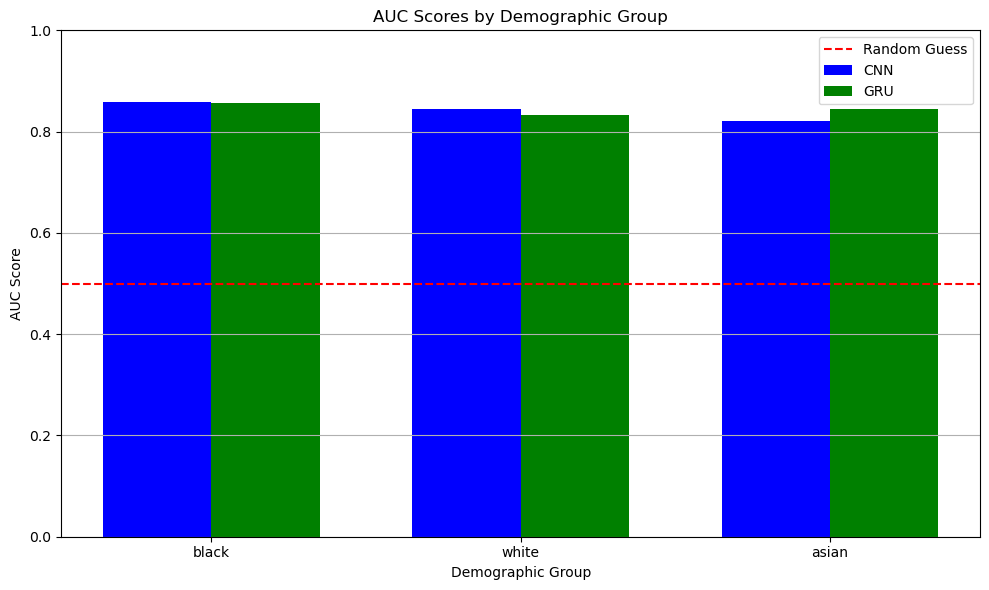

In [21]:
import matplotlib.pyplot as plt
import numpy as np


# Prepare data for plotting
groups = list(auc_results['cnn'].keys())
cnn_aucs = [auc_results['cnn'].get(group, 0) for group in groups]
gru_aucs = [auc_results['gru'].get(group, 0) for group in groups]

x = np.arange(len(groups))  # the label locations
width = 0.35  # the width of the bars

# Step 9: Plot the AUC results
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, cnn_aucs, width, label='CNN', color='blue')
bars2 = plt.bar(x + width/2, gru_aucs, width, label='GRU', color='green')

plt.xlabel('Demographic Group')
plt.ylabel('AUC Score')
plt.title('AUC Scores by Demographic Group')
plt.xticks(x, groups)
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1
plt.axhline(y=0.5, color='r', linestyle='--', label='Random Guess')  # Add a horizontal line at 0.5 for reference
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


# QCNN

In [29]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from sklearn.decomposition import PCA

In [35]:
# Step 5: Dimensionality reduction to match the number of qubits 
n_qubits = 8
pca = PCA(n_components=n_qubits)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Step 6: Prepare the feature map
feature_map = ZFeatureMap(n_qubits)

# Define Quantum Circuit for QCNN
def create_qcnn(num_qubits):
    circuit = QuantumCircuit(num_qubits)
    params = ParameterVector('θ', length=num_qubits * 3)

    for i in range(num_qubits):
        circuit.ry(params[i], i)  # Parameterized rotation

    # Add entanglement and pooling
    for i in range(0, num_qubits - 1, 2):
        circuit.cx(i, i + 1)
        circuit.rz(params[num_qubits + i], i + 1)
    
    return circuit

# Build the QCNN model
ansatz = create_qcnn(n_qubits)

# Combine feature map and ansatz into a single circuit
circuit = QuantumCircuit(n_qubits)
circuit.compose(feature_map, inplace=True)
circuit.compose(ansatz, inplace=True)

# Define the observable
observable = SparsePauliOp.from_list([("Z" + "I" * (n_qubits - 1), 1)])

# Set up the Quantum Neural Network
qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
)

# Define the callback function for printing the objective function value
def print_callback(weights, obj_func_eval):
    print(f"Iteration: {len(objective_func_vals) + 1}, Objective Function Value: {obj_func_eval:.4f}")
    objective_func_vals.append(obj_func_eval)

# Store objective function values for plotting
objective_func_vals = []

# Initialize the classifier
classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations here
    callback=print_callback,  # Add the callback function
)

# Train the classifier
classifier.fit(X_train_reduced, y_train)

# Calculate and print only the overall accuracy on the test set
overall_accuracy = classifier.score(X_test_reduced, y_test)
print(f"Overall ACU: {np.round(100 * overall_accuracy, 2)}%")

Iteration: 1, Objective Function Value: 0.7313
Iteration: 2, Objective Function Value: 0.7313
Iteration: 3, Objective Function Value: 0.7313
Iteration: 4, Objective Function Value: 0.7313
Iteration: 5, Objective Function Value: 0.7313
Iteration: 6, Objective Function Value: 0.7313
Iteration: 7, Objective Function Value: 0.7313
Iteration: 8, Objective Function Value: 0.6657
Iteration: 9, Objective Function Value: 0.4392
Iteration: 10, Objective Function Value: 0.4392
Iteration: 11, Objective Function Value: 0.4392
Iteration: 12, Objective Function Value: 0.4392
Iteration: 13, Objective Function Value: 0.4392
Iteration: 14, Objective Function Value: 0.4260
Iteration: 15, Objective Function Value: 0.4545
Iteration: 16, Objective Function Value: 0.4260
Iteration: 17, Objective Function Value: 0.4289
Iteration: 18, Objective Function Value: 0.4260
Iteration: 19, Objective Function Value: 0.4283
Iteration: 20, Objective Function Value: 0.4260
Iteration: 21, Objective Function Value: 0.4315
I

In [39]:
from sklearn.metrics import roc_auc_score

# Step 8: Evaluate the model for each group
groups = df['race'].unique()  # Use the original DataFrame to get unique races
auc_results = {}

for group in groups:
    # Filter the test dataset for the current group
    group_test_df = test_df[test_df['race'] == group]

    if group_test_df.empty:
        print(f"No data for {group}.")
        continue

    # Tokenize and pad sequences for the current group
    X_group_test = pad_sequences(tokenizer.texts_to_sequences(group_test_df[text_column]), maxlen=200)
    y_group_test = group_test_df[label_column].values

    # Apply PCA to reduce dimensions for the quantum model
    X_group_test_reduced = pca.transform(X_group_test)

    # Predict probabilities for the group
    y_group_pred_probs = classifier.predict(X_group_test_reduced)  # This will give class labels

    # Convert class predictions to binary probabilities manually (if binary classification)
    if len(set(y_group_test)) == 2:
        y_group_pred_probs = (y_group_pred_probs == 1).astype(float)  # Assuming '1' is the positive class
    else:
        # For multiclass, one-vs-all probabilities might need to be implemented
        raise NotImplementedError("Multiclass AUC evaluation not implemented.")

    # Calculate AUC for the group
    group_auc = roc_auc_score(y_group_test, y_group_pred_probs)
    auc_results[group] = group_auc

# Print the AUC results for each group
for group, auc in auc_results.items():
    print(f'AUC for {group} group: {auc:.4f}')

AUC for black group: 0.5001
AUC for white group: 0.5034
AUC for asian group: 0.5031


# Hybrid QCNN

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit import QuantumCircuit
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Step 1: Load and preprocess dataset (clinical notes)
clinical_notes_df = pd.read_csv('clinical_notes.csv')  # Replace with your actual dataset path

# Encode labels
label_column = 'glaucoma'
label_encoder = LabelEncoder()
clinical_notes_df[label_column] = label_encoder.fit_transform(clinical_notes_df[label_column])

# Train-test split
train_df, test_df = train_test_split(clinical_notes_df, test_size=0.2, random_state=42)

# Tokenization
text_column = 'note'
tokenizer = Tokenizer(num_words=1000)  # Limit to 1000 most frequent words
tokenizer.fit_on_texts(train_df[text_column])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df[text_column]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df[text_column]), maxlen=200)

y_train = train_df[label_column].values
y_test = test_df[label_column].values

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Binary output
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batch processing
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# Define and create QNN
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    # Ensure input_gradients=True for enabling hybrid gradient backprop
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn

qnn4 = create_qnn()

class Net(nn.Module):
    def __init__(self, qnn):
        super(Net, self).__init__()

        # Classical CNN layers (1D convolutions for sequences)
        self.conv1 = nn.Conv1d(1, 2, kernel_size=5)  # 1 input channel (text), 2 output channels
        self.conv2 = nn.Conv1d(2, 16, kernel_size=5)
        self.dropout = nn.Dropout1d(0.5)

        # Calculate the output size after convolutions and pooling
        self.conv1_output_size = (200 - 5 + 1) // 2  # Assuming input sequence length = 200
        self.conv2_output_size = (self.conv1_output_size - 5 + 1) // 2  # Adjusting for second conv layer

        # Fully connected layers
        self.fc1 = nn.Linear(self.conv2_output_size * 16, 64)
        self.fc2 = nn.Linear(64, 2)  # Output to QNN
        
        # QNN connection
        self.qnn = TorchConnector(qnn)  # Assuming qnn is already created

        # Final output layer (single value for binary classification)
        # Since QNN output is (batch_size, 1), fc3 will have input size of 1
        self.fc3 = nn.Linear(1, 1)  # 1 output from QNN, convert to 1 output for binary classification

    def forward(self, x):
        # CNN layers
        x = x.unsqueeze(1)  # Add a channel dimension for CNN (batch_size, 1, sequence_length)
        x = F.relu(self.conv1(x))  # Apply ReLU after conv1
        x = F.max_pool1d(x, 2)  # Max pooling after conv1
        x = F.relu(self.conv2(x))  # Apply ReLU after conv2
        x = F.max_pool1d(x, 2)  # Max pooling after conv2

        # Dropout
        x = self.dropout(x)

        # Flatten the output of the last convolution layer
        x = x.view(x.shape[0], -1)  # Flatten the tensor for fully connected layers

        # Fully connected layers
        x = F.relu(self.fc1(x))  # Apply ReLU after fc1
        x = self.fc2(x)  # Output of fc2 (input to QNN)

        # Pass through QNN
        x = self.qnn(x)  # Apply QNN

        # Flatten the output of QNN to match the input size of the next linear layer
        x = x.view(x.shape[0], -1)  # Flatten QNN output to (batch_size, 1) for the next linear layer

        # Final output layer after QNN output
        x = self.fc3(x)  # Output of fc3 (1 value per sample for binary classification)

        return x  # Single output per sample (logit for BCEWithLogitsLoss)
        
model4 = Net(qnn4)

# Define optimizer and loss function
optimizer = optim.Adam(model4.parameters(), lr=0.001)
loss_func = nn.BCEWithLogitsLoss()  # For binary classification

# Training loop
epochs = 10  # Set number of epochs
loss_list = []  # Store loss history
model4.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        
        # Convert input data and target to float32 (necessary for CNN layers)
        data = data.float()  # No need to unsqueeze as we're using Conv1d
        target = target.float()  # Ensure target is in float32 for BCEWithLogitsLoss
        
        output = model4(data)  # Forward pass
        loss = loss_func(output, target)  # Calculate loss (BCEWithLogitsLoss already applies sigmoid)
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
        
    loss_list.append(sum(total_loss) / len(total_loss))
    print(f"Training [{100.0 * (epoch + 1) / epochs:.0f}%]\tLoss: {loss_list[-1]:.4f}")

C:\Users\C00591145\AppData\Local\Temp\ipykernel_18212\1238397449.py:59: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(
C:\Users\C00591145\AppData\Local\Temp\ipykernel_18212\1238397449.py:59: UserWarning: No number of qubits was not specified (None) and was retrieved from `circuit` (2). If `circuit` is transpiled, this may cause unstable behaviour.
  qnn = EstimatorQNN(


Training [10%]	Loss: 0.7051
Training [20%]	Loss: 0.6969
Training [30%]	Loss: 0.6946
Training [40%]	Loss: 0.6940
Training [50%]	Loss: 0.6933
Training [60%]	Loss: 0.6934
Training [70%]	Loss: 0.6933
Training [80%]	Loss: 0.6933
Training [90%]	Loss: 0.6932
Training [100%]	Loss: 0.6932


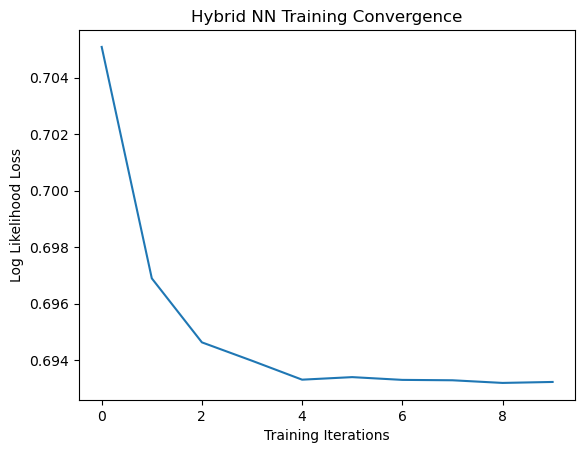

In [19]:
import matplotlib.pyplot as plt
# Plot loss convergence
plt.plot(loss_list)
plt.title("Hybrid NN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Log Likelihood Loss")
plt.show()

In [33]:
import torch

# Load model
torch.save(model4.state_dict(), "glaucoma_model.pt")

qnn5 = create_qnn()
model5 = Net(qnn5)
model5.load_state_dict(torch.load("glaucoma_model.pt"))

# Set model to evaluation mode
model5.eval()

# Start evaluating
total_loss = []  # List to store loss values
correct = 0  # Counter for correct predictions
total_samples = 0  # Counter for total samples

# Use no_grad() context to save memory during evaluation
with torch.no_grad():  
    for batch_idx, (data, target) in enumerate(test_loader):
        data = data.float()  # Ensure data is in the correct type
        target = target.float()  # Ensure target is in the correct type

        # Forward pass
        output = model5(data)

        # Apply sigmoid to output for binary classification
        output = torch.sigmoid(output)

        # Convert logits to binary predictions
        pred = (output > 0.5).float()  # Binary thresholding at 0.5

        # Count correct predictions
        correct += pred.eq(target.view_as(pred)).sum().item()
        total_samples += target.size(0)

        # Calculate loss
        loss = loss_func(output, target)
        total_loss.append(loss.item())

# Compute average loss and accuracy
avg_loss = sum(total_loss) / len(total_loss)
accuracy = 100.0 * correct / total_samples

# Print evaluation results
print(f"Performance on test data:\n\tLoss: {avg_loss:.4f}\n\tAccuracy: {accuracy:.1f}%")

C:\Users\C00591145\AppData\Local\Temp\ipykernel_18212\1238397449.py:59: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(
C:\Users\C00591145\AppData\Local\Temp\ipykernel_18212\1238397449.py:59: UserWarning: No number of qubits was not specified (None) and was retrieved from `circuit` (2). If `circuit` is transpiled, this may cause unstable behaviour.
  qnn = EstimatorQNN(
C:\Users\C00591145\AppData\Local\Temp\ipykernel_18212\692616813.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the 

Performance on test data:
	Loss: 0.7133
	Accuracy: 51.0%


In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import torch

# Assuming you have 'model4' as your trained hybrid model (CNN + QNN)
model4.eval()  # Set the model to evaluation mode

# Initialize the dictionary to store AUC results
auc_results = {}

# Iterate over the unique groups (races)
for group in groups:
    # Filter the test dataset for the current group
    group_test_df = test_df[test_df['race'] == group]

    if group_test_df.empty:
        print(f"No data for {group}.")
        continue

    # Tokenize and pad sequences for the current group
    X_group_test = pad_sequences(tokenizer.texts_to_sequences(group_test_df[text_column]), maxlen=200)
    y_group_test = group_test_df[label_column].values

    # Convert to PyTorch tensors
    X_group_test_tensor = torch.tensor(X_group_test, dtype=torch.long)  # Initial integer tensor
    y_group_test_tensor = torch.tensor(y_group_test, dtype=torch.float32).view(-1, 1)

    # Convert X_group_test_tensor to float32 for model input
    X_group_test_tensor = X_group_test_tensor.float()  # Convert to float32

    # Perform predictions using model4
    with torch.no_grad():  # Disable gradient calculation for inference
        y_group_pred_logits = model4(X_group_test_tensor)  # Get logits (before sigmoid)
        y_group_pred_probs = torch.sigmoid(y_group_pred_logits).cpu().numpy()  # Apply sigmoid to get probabilities

    # For binary classification, we only need the positive class probability
    if len(set(y_group_test)) == 2:
        y_group_pred_probs = y_group_pred_probs[:, 0]  # Get the probability for class 1 (positive class)
    elif len(set(y_group_test)) > 2:
        # For multiclass, AUC can be calculated for each class (one-vs-rest approach)
        y_group_test_bin = label_binarize(y_group_test, classes=[0, 1, 2])  # Replace with actual classes
        group_auc = roc_auc_score(y_group_test_bin, y_group_pred_probs, multi_class='ovr')
        auc_results[group] = group_auc
        continue  # Skip AUC calculation for multiclass and move to next group

    # For binary classification, calculate the AUC
    group_auc = roc_auc_score(y_group_test, y_group_pred_probs)
    auc_results[group] = group_auc

# Print the AUC results for each group
for group, auc in auc_results.items():
    print(f'AUC for {group} group: {auc:.4f}')

AUC for black group: 0.4545
AUC for white group: 0.5164
AUC for asian group: 0.4554


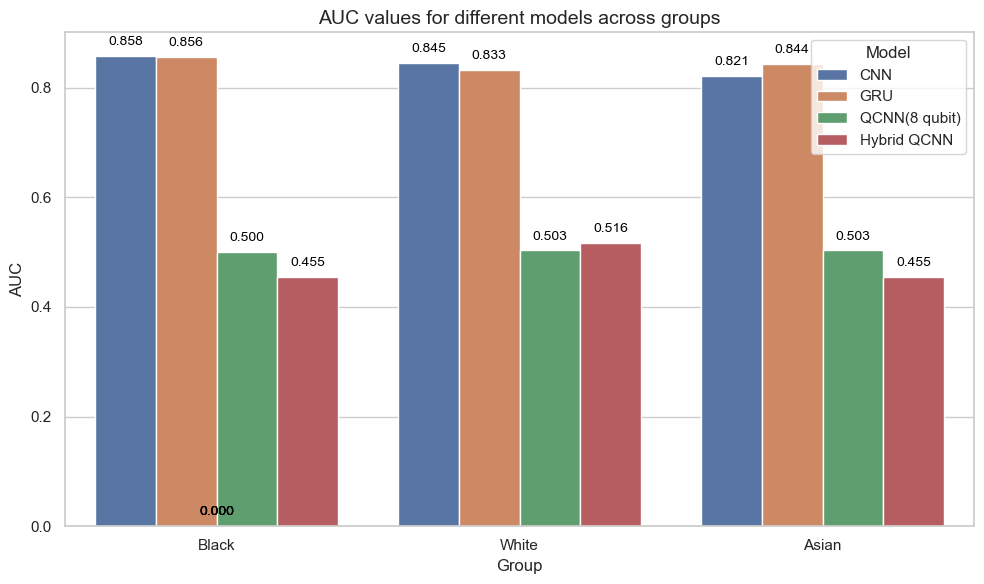

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
data = {
    'Group': ['Black', 'Black', 'Black', 'Black', 'White', 'White', 'White', 'White', 'Asian', 'Asian', 'Asian', 'Asian'],
    'Model': ['CNN', 'GRU', 'QCNN(8 qubit)', 'Hybrid QCNN',
              'CNN', 'GRU', 'QCNN(8 qubit)', 'Hybrid QCNN',
              'CNN', 'GRU', 'QCNN(8 qubit)', 'Hybrid QCNN'],
    'AUC': [0.858, 0.856, 0.500, 0.455,
            0.845, 0.833, 0.503, 0.516,
            0.821, 0.844, 0.503, 0.455]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the visual style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Group', y='AUC', hue='Model', data=df)

# Adding annotations to display the AUC values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

# Set the labels and title
ax.set_title('AUC values for different models across groups', fontsize=14)
ax.set_xlabel('Group', fontsize=12)
ax.set_ylabel('AUC', fontsize=12)

# Save the plot as a PDF
plt.tight_layout()
plt.savefig('AUC_values_plot.pdf', format='pdf')

# Optionally, you can still show the plot in your notebook or script
plt.show()